# Best Canadian City to Live In: Data Analysis

In [5]:
city_data_df = pd.DataFrame('data/city_table.csv')

In [6]:
city_data_df

,City,Province/Territory,Population,Land_Area,Population_Density,House_Price,Rent_Price,Crime_Severity_Index,Unemployment_Rate,Average_Income,Cost_of_Living_Index,Local_Purchasing_Power,Composite_HPI,Summer_Avg_Temp,Winter_Avg_Temp,Annual_Avg_Temp
0,Vancouver,BC,3108941,2878.93,1079.89,1191200,2883,81.20,5.9,90000,66.4,103.7,338.8,18.2,3.2,10.7
1,Victoria,BC,441491,695.29,634.97,866300,2474,71.04,3.9,85000,67.8,91.5,290.6,17.9,4.0,11.0
2,Calgary,AB,1778881,5098.68,348.89,578900,1927,62.32,7.7,96000,65.0,111.8,278.3,17.0,-7.0,5.0
3,Edmonton,AB,1631614,9416.19,173.28,392200,1560,101.12,7.5,96000,61.0,112.2,232.5,16.0,-10.0,3.0
4,Saskatoon,SK,367336,5864.48,62.64,397500,1490,106.71,5.1,89000,64.9,100.9,310.4,17.0,-11.0,2.5
5,Regina,SK,282032,4323.66,65.23,316600,1542,100.31,6.3,90000,62.5,107.4,298.4,16.5,-10.5,3.0
6,Winnipeg,MB,941641,5285.46,178.16,357300,1528,124.41,5.5,83000,60.1,112.4,299.0,16.0,-14.0,1.0
7,Toronto,ON,7106379,5902.75,1203.91,1038100,2612,59.35,8.0,97000,66.8,109.2,329.2,21.0,-4.0,8.5
8,London,ON,626260,2661.48,235.31,608500,1920,61.22,6.6,79500,56.3,109.8,404.8,20.0,-4.5,7.8
9,Halifax,NS,530167,7276.22,72.86,538600,2116,73.95,5.5,81000,63.3,101.7,308.8,17.0,0.0,8.5


## Data Normalization

To ensure all numeric features contribute equally to the livability score, we apply **Min-Max Normalization**.  
This scales each numeric column to a range between 0 and 1 

- Values closer to 1 indicate higher relative performance for that metric.  
- This step is essential because features like population, income, and house prices are on very different scales, and simple averaging would unfairly favor larger numbers.


In [10]:
numeric_cols = city_data_df.select_dtypes(include=['number']).columns

normalized_table = city_data_df.copy()
normalized_table[numeric_cols] = ((city_data_df[numeric_cols] - city_data_df[numeric_cols].min()) / (city_data_df[numeric_cols].max() - city_data_df[numeric_cols].min())).round(2)

normalized_table.head()


,City,Province/Territory,Population,Land_Area,Population_Density,House_Price,Rent_Price,Crime_Severity_Index,Unemployment_Rate,Average_Income,Cost_of_Living_Index,Local_Purchasing_Power,Composite_HPI,Summer_Avg_Temp,Winter_Avg_Temp,Annual_Avg_Temp
0,Vancouver,BC,0.41,0.25,0.89,1.00,1.00,0.39,0.49,0.64,0.89,0.30,0.62,0.44,0.96,0.97
1,Victoria,BC,0.02,0.00,0.50,0.63,0.75,0.25,0.00,0.41,1.00,0.00,0.34,0.38,1.00,1.00
2,Calgary,AB,0.22,0.50,0.25,0.30,0.43,0.13,0.93,0.91,0.78,0.50,0.27,0.20,0.39,0.40
3,Edmonton,AB,0.20,1.00,0.10,0.09,0.20,0.67,0.88,0.91,0.47,0.51,0.00,0.00,0.22,0.20
4,Saskatoon,SK,0.01,0.59,0.00,0.09,0.16,0.75,0.29,0.59,0.77,0.23,0.45,0.20,0.17,0.15


In [12]:
normalized_table.describe().round(2)

,Population,Land_Area,Population_Density,House_Price,Rent_Price,Crime_Severity_Index,Unemployment_Rate,Average_Income,Cost_of_Living_Index,Local_Purchasing_Power,Composite_HPI,Summer_Avg_Temp,Winter_Avg_Temp,Annual_Avg_Temp
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,0.23,0.50,0.32,0.34,0.42,0.35,0.55,0.52,0.56,0.38,0.41,0.36,0.46,0.51
std,0.29,0.27,0.36,0.31,0.31,0.32,0.28,0.36,0.32,0.25,0.23,0.31,0.30,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.04,0.32,0.10,0.09,0.19,0.12,0.39,0.23,0.40,0.24,0.29,0.20,0.22,0.20
50%,0.10,0.50,0.15,0.25,0.42,0.25,0.56,0.59,0.59,0.40,0.38,0.20,0.44,0.60
75%,0.22,0.60,0.50,0.43,0.59,0.66,0.66,0.91,0.78,0.50,0.45,0.60,0.56,0.75
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [15]:
normalized_table[numeric_cols].corr().round(2)

,Population,Land_Area,Population_Density,House_Price,Rent_Price,Crime_Severity_Index,Unemployment_Rate,Average_Income,Cost_of_Living_Index,Local_Purchasing_Power,Composite_HPI,Summer_Avg_Temp,Winter_Avg_Temp,Annual_Avg_Temp
Population,1.00,0.12,0.85,0.54,0.38,-0.36,0.55,0.25,0.20,0.01,0.06,0.66,0.17,0.33
Land_Area,0.12,1.00,-0.32,-0.35,-0.21,0.24,0.50,0.48,-0.05,0.58,-0.49,-0.21,-0.45,-0.43
Population_Density,0.85,-0.32,1.00,0.78,0.58,-0.41,0.19,0.06,0.33,-0.29,0.19,0.64,0.53,0.63
House_Price,0.54,-0.35,0.78,1.00,0.92,-0.45,0.06,0.27,0.55,-0.06,0.37,0.63,0.79,0.83
Rent_Price,0.38,-0.21,0.58,0.92,1.00,-0.29,0.05,0.41,0.70,0.07,0.37,0.52,0.80,0.81
Crime_Severity_Index,-0.36,0.24,-0.41,-0.45,-0.29,1.00,-0.20,0.12,0.14,0.04,-0.20,-0.66,-0.52,-0.64
Unemployment_Rate,0.55,0.50,0.19,0.06,0.05,-0.20,1.00,0.55,-0.05,0.52,-0.04,0.29,-0.27,-0.15
Average_Income,0.25,0.48,0.06,0.27,0.41,0.12,0.55,1.00,0.60,0.61,-0.27,0.05,-0.07,-0.05
Cost_of_Living_Index,0.20,-0.05,0.33,0.55,0.70,0.14,-0.05,0.60,1.00,-0.12,-0.05,0.05,0.46,0.37
Local_Purchasing_Power,0.01,0.58,-0.29,-0.06,0.07,0.04,0.52,0.61,-0.12,1.00,-0.06,0.09,-0.36,-0.26


### Correlation Analysis

We computed the correlation matrix to understand the relationships between numeric features.  

Key observations:
- House Price and Rent Price are strongly positively correlated (0.92), as expected.
- Summer_Avg_Temp & Population (0.66) → Slight tendency that larger cities are in warmer areas (e.g., Vancouver, Toronto).
- Crime Severity Index is negatively correlated with Summer Avg Temp (-0.66), indicating cities with warmer summers tend to have lower crime severity in our dataset.
- Population_Density & House_Price (0.78) → Densely populated cities tend to have more expensive housing.
- Cost_of_Living_Index & Rent_Price (0.70) → Expected: higher rents increase cost of living.

    
These insights will help in weighting features when calculating the overall livability score.

##### Positive Matrix: 
- Average_Income, Local_Purchasing_Power, Summer/Winter/Annual Temp 

##### Negative Matrix: 
- Crime_Severity_Index, Unemployment_Rate, Cost_of_Living_Index, Composite_HPI

In [39]:
normalized_table['Crime_Severity_Index_inv'] = 1 - normalized_table['Crime_Severity_Index']
normalized_table['Unemployment_Rate_inv'] = 1 - normalized_table['Unemployment_Rate']
normalized_table['Cost_of_Living_Index_inv'] = 1 - normalized_table['Cost_of_Living_Index']
normalized_table['Composite_HPI_inv'] = 1 - normalized_table['Composite_HPI']

In [40]:
normalized_table['Livability_Score'] = normalized_table[[
    'Average_Income',
    'Local_Purchasing_Power',
    'Composite_HPI',
    'Crime_Severity_Index_inv',
    'Unemployment_Rate_inv',
    'Cost_of_Living_Index_inv',
    'House_Price',
    'Annual_Avg_Temp'
]].mean(axis=1).round(2)


In [41]:
normalized_table[['City', 'Livability_Score']].sort_values(by='Livability_Score', ascending=False).reset_index(drop=True)

,City,Livability_Score
0,Ottawa,0.63
1,London,0.60
2,Vancouver,0.60
3,Toronto,0.56
4,Victoria,0.52
5,Québec City,0.46
6,Halifax,0.45
7,Calgary,0.44
8,Montréal,0.41
9,Regina,0.35


## Insights from City Livability Analysis

### 1. Top Cities
- **Observation:** Ottawa, London, and Québec City have the highest livability scores.
- **Reasoning:** These cities balance high income, good purchasing power, moderate housing prices, and low crime.
- **Insight:** Smaller or mid-sized cities can sometimes provide better overall livability than large, expensive cities like Toronto or Vancouver.

### 2. Large Cities vs Medium/Small Cities
- Cities like Toronto, Calgary, and Vancouver have high income and HPI, but their scores are reduced due to high cost of living and moderate crime/unemployment.
- **Insight:** High population and economic opportunities don’t always translate to higher livability.

### 3. Negative Metrics Impact
- **Observation:** Although Montréal has comparable income and housing prices to Québec City, its higher crime rate and slightly higher unemployment contribute to a lower overall livability score, making Québec City a safer and more balanced choice according to our metrics.
- **Reasoning:** Crime, unemployment, and cost of living negatively affect the score.
- **Insight:** Even cities with strong economic indicators (income, purchasing power) may rank lower if negative factors are high. For 

### 4. General Trend
- Mid-sized cities in Eastern and Central Canada often provide the best combination of affordability, safety, and income.
- **Insight:** Livability is multifactorial — it’s not just about money or housing; safety, employment, and overall cost matter too.



## Weighted Livability Score Analysis

To better reflect real-world livability, we assigned **weights to each metric**, giving more importance to **housing affordability** (Composite_HPI_inv) and **crime**.

### Weights Used:
- Average Income: 10%
- Local Purchasing Power: 15%
- Composite_HPI_inv (housing affordability): 25%
- Crime_Severity_Index_inv: 25%
- Unemployment Rate_inv: 15%
- Cost of Living Index_inv: 15%

In [75]:
weights = {
    'Average_Income': 0.10,
    'Local_Purchasing_Power': 0.15,
    'Composite_HPI_inv': 0.25,  
    'Crime_Severity_Index_inv': 0.25,
    'Unemployment_Rate_inv': 0.15,
    'Cost_of_Living_Index_inv': 0.15
}

normalized_table['Livability_Score_Weighted'] = (
    normalized_table['Average_Income'] * weights['Average_Income'] +
    normalized_table['Local_Purchasing_Power'] * weights['Local_Purchasing_Power'] +
    normalized_table['Composite_HPI_inv'] * weights['Composite_HPI_inv'] +
    normalized_table['Crime_Severity_Index_inv'] * weights['Crime_Severity_Index_inv'] +
    normalized_table['Unemployment_Rate_inv'] * weights['Unemployment_Rate_inv'] +
    normalized_table['Cost_of_Living_Index_inv'] * weights['Cost_of_Living_Index_inv']
)
# 0.10, 0.15, 0.25,0.25, 0.15, 0.15

In [76]:
normalized_table[['City', 'Livability_Score_Weighted']]\
    .sort_values(by='Livability_Score_Weighted', ascending=False).reset_index(drop=True).round(2)

,City,Livability_Score_Weighted
0,Ottawa,0.78
1,Québec City,0.71
2,Calgary,0.61
3,Edmonton,0.60
4,Montréal,0.59
5,Victoria,0.54
6,Halifax,0.52
7,Toronto,0.51
8,London,0.49
9,Regina,0.49


## Insights from Weighted Livability Score

### 1. **Top Cities:**  
   - Ottawa, Québec City and Calgary rank highest.  
   - These cities balance **income, housing affordability, safety, and cost of living** effectively, making them the most livable according to the weighted metrics.


### 2. **Effect of Weighting:**  
   - Emphasizing **housing affordability (Composite_HPI_inv)** and **crime** slightly changes the rankings compared to the unweighted score.  
   - Cities with high income but expensive housing, such as Toronto and Vancouver, see their scores decrease.  


### 3. **Balanced Trade-offs:**  
   - Some cities previously tied in the unweighted score (e.g., Winnipeg, Saskatoon, Montréal) now reflect differences in **housing cost and safety** more clearly.  


### 4. **Practical Implication:**  
   - Weighting metrics according to human priorities (affordable housing and safety) provides a **more realistic measure of livability** than a simple average.  


### 5. **General Trend:**  
   - Mid-sized cities in Eastern and Central Canada often outperform larger metropolitan areas in overall livability when housing affordability and crime are prioritized.  


### Key Insight
**Ottawa remains the best city to live in**, both in the unweighted and weighted livability scores. This indicates that Ottawa consistently balances **income, housing affordability, safety, and overall quality of life**, making it the most livable city among the Canadian cities in our dataset.


# Data Visualization

In [81]:
import matplotlib.pyplot as plt

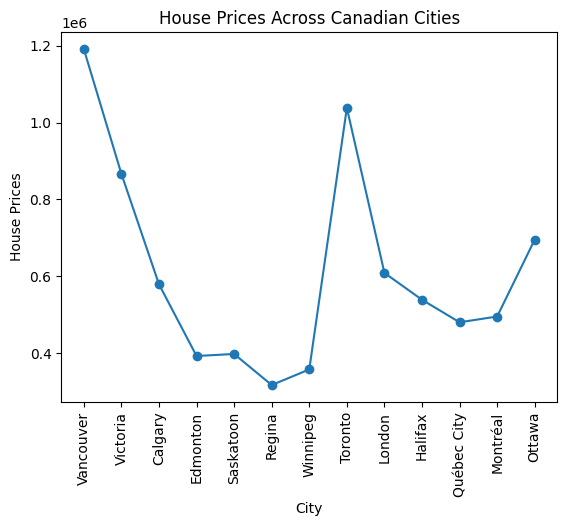

In [109]:
plt.plot(city_data_df['City'], city_data_df['House_Price'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('House Prices')
plt.title('House Prices Across Canadian Cities')
plt.show()